In [10]:
from statistics import mean
import quandl
import numpy as np
import matplotlib.pyplot as plt
import math

In [12]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]
df.dropna(inplace=True)
forcast_col = 'Adj. Close'
forcast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forcast_col].shift(-forcast_out)
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,label
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,69.078238
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,67.839414
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,68.912727
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,70.668146
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,71.219849
2004-08-26,52.637487,54.142132,52.492038,54.122070,7094800.0,72.278116
2004-08-27,54.217364,54.478169,53.008633,53.239345,6211700.0,74.810934
2004-08-30,52.802998,52.908323,51.162935,51.162935,5196700.0,74.199045
2004-08-31,51.318415,52.015567,51.238167,51.343492,4917800.0,70.462511


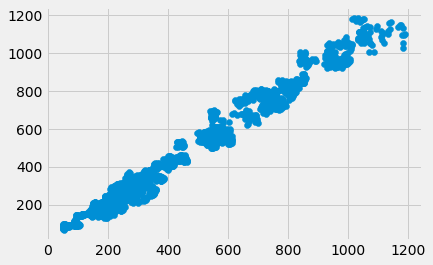

In [40]:
my_x = np.array(df['Adj. Close'])[-forcast_out:]
df.dropna(inplace = True)
xs = np.array(df['Adj. Close'])
ys = np.array(df['label'])
plt.scatter(xs,ys)
plt.show()

In [41]:
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')
m = ((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2))
print(m)

1.0172830132960318


In [42]:
b = mean(ys) - (m*mean(xs))
print(b)

3.762132085707549


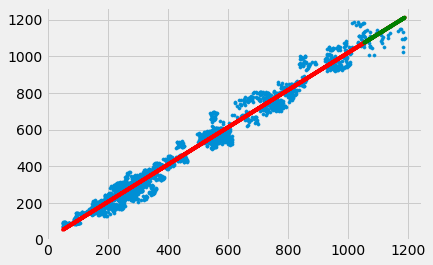

In [56]:
data_regression_line = [(m*x) + b for x in xs]
test_regression_line = [(m*x) + b for x in my_x]
plt.scatter(xs,ys,s = 10)
plt.plot(xs, data_regression_line, color='r')
plt.plot(my_x, test_regression_line, color='g')
plt.show()